Project Task 2 - Advanced Classifiers and Evaluation

1) Using the dataset for classification prepared for Task 1 build several advanced classifiers able to predict room occupancy from the available variables. In particular, you are required to use SVM (linear and non-linear), NN (Single and Multilayer Perceptron), DNN (design at least two different architectures), Ensemble Classifier (RandomForest, AdaBoost and a Bagging technique in which you can select a base classifier of your choice with a justification).

2) Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, etc; Draw your conclusion about the classifiers.

3) Highlight in the report different aspects typical of each classifier. For instance for SVM: is a linear model the best way to shape the decision boundary? Or for NN: what are the parameter sets or the convergence criteria suggesting you are avoiding overfitting? How many iterations/base classifiers are needed to allow a good estimation using an ensemble method? Which is the feature importance for the Random Forest?

4) You are NOT required to experiment also in the imbalanced case but if you do it is not considered a mistake.

In [52]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df1 = pd.read_csv("datatest.txt")

In [3]:
df2 = pd.read_csv("datatest2.txt")

In [4]:
df3 = pd.read_csv("datatraining.txt")

In [5]:
df = pd.concat([df1,df2,df3])

In [6]:
df.shape

(20560, 7)

In [7]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [8]:
df_train.reset_index(inplace=True, drop=True)

In [9]:
df_train.shape

(16448, 7)

In [10]:
df_test.shape

(4112, 7)

In [11]:
dates = pd.to_datetime(df_train['date'], infer_datetime_format=True)
df_train['day'] = dates.dt.day
df_train['hour'] = dates.dt.hour

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
weekend = []
for i in df_train.day:
    if i == 7 or i == 8:
        weekend.append(1)
    else:
        weekend.append(0)
weekend = pd.Series(weekend)
df_train['weekend'] = weekend

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
daylight = []
for i in df_train.hour:
    if i >= 7 and i <= 17:
        daylight.append(1)
    else:
        daylight.append(0)
daylight = pd.Series(daylight)
df_train['daylight'] = daylight

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,weekend,daylight
0,2015-02-13 00:55:59,21.000000,24.995,0.0,575.5,0.003840,0,13,0,0,0
1,2015-02-12 23:09:00,21.000000,25.745,0.0,564.0,0.003956,0,12,23,0,0
2,2015-02-14 05:47:00,19.600000,38.290,0.0,501.0,0.005409,0,14,5,0,0
3,2015-02-14 00:53:00,19.890000,34.900,0.0,506.5,0.005016,0,14,0,0,0
4,2015-02-15 00:04:59,19.926667,35.700,0.0,540.0,0.005144,0,15,0,0,0


In [15]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16448 entries, 0 to 16447
Data columns (total 11 columns):
date             16448 non-null object
Temperature      16448 non-null float64
Humidity         16448 non-null float64
Light            16448 non-null float64
CO2              16448 non-null float64
HumidityRatio    16448 non-null float64
Occupancy        16448 non-null int64
day              16448 non-null int64
hour             16448 non-null int64
weekend          16448 non-null int64
daylight         16448 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.4+ MB


In [17]:
df_train = df_train[['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'day', 'hour', 'daylight']]

# Data Preparation

In [18]:
def prepare_dataset(df, class_name):
    df = remove_missing_values(df)
    numeric_columns = get_numeric_columns(df)
    rdf = df.copy(deep=True)
    df, feature_names, class_values = one_hot_encoding(df, class_name)
    real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
    rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
    features_map = get_features_map(feature_names, real_feature_names)

    return df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map

def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df

def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns

def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values

def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map

In [19]:
class_name = 'Occupancy'

In [20]:
res = prepare_dataset(df_train, class_name)
df_train, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df_train.head()

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


,Temperature,Humidity,Light,CO2,day,hour,daylight,Occupancy
0,21.000000,24.995,0.0,575.5,13,0,0,0
1,21.000000,25.745,0.0,564.0,12,23,0,0
2,19.600000,38.290,0.0,501.0,14,5,0,0
3,19.890000,34.900,0.0,506.5,14,0,0,0
4,19.926667,35.700,0.0,540.0,15,0,0,0


# Data Partitioning

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [22]:
attributes = [col for col in df_train.columns if col != class_name]
X = df_train[attributes].values
y = df_train[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y) # IMPORTANT test_size change shape

In [23]:
X_train.shape

(13158, 7)

# Normalization

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Sklearn Multilayer Perceptron

In [26]:
from sklearn.neural_network import MLPClassifier

### Parameters

hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

activation {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
Activation function for the hidden layer.
* 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x
* 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).
* 'relu', the rectified linear unit function, returns f(x) = max(0, x)

solver {'lbfgs', 'sgd', 'adam'}, default='adam'
The solver for weight optimization.
* 'lbfgs' is an optimizer in the family of quasi-Newton methods.
* 'sgd' refers to stochastic gradient descent.
* 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
The default solver 'adam' works pretty well on relatively large datasets (>= 1000 training samples) in terms of both training time and validation score. For small datasets, 'lbfgs' can converge faster and perform better.

alpha float, default=0.0001
L2 penalty (regularization term) parameter.

batch_size int, default='auto'
Size of minibatches for stochastic optimizers. If the solver is 'lbfgs', the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

learning_rate {'constant', 'invscaling', 'adaptive'}, default='constant'
Learning rate schedule for weight updates.
*'constant' is a constant learning rate given by 'learning_rate_init'.
*'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of *'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)
*'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.
Only used when solver='sgd'.

learning_rate_init double, default=0.001
The initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam'.

power_t double, default=0.5
The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to 'invscaling'. Only used when solver='sgd'.

max_iter int, default=200
Maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations. For stochastic solvers ('sgd', 'adam'), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

shuffle bool, default=True
Whether to shuffle samples in each iteration. Only used when solver='sgd' or 'adam'.

random_state int, RandomState instance or None, default=None
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

tol float, default=1e-4
Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to 'adaptive', convergence is considered to be reached and training stops.

verbose bool, default=False
Whether to print progress messages to stdout.

warm_start bool, default=False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

momentum float, default=0.9
Momentum for gradient descent update. Should be between 0 and 1. Only used when solver='sgd'.

early_stopping bool, default=False
Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. Only effective when solver='sgd' or 'adam'

validation_fraction float, default=0.1
The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True

beta_1 float, default=0.9
Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver='adam'

beta_2 float, default=0.999
Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver='adam'

epsilon float, default=1e-8
Value for numerical stability in adam. Only used when solver='adam'

n_iter_no_change int, default=10
Maximum number of epochs to not meet tol improvement. Only effective when solver='sgd' or 'adam'


### Attributes
loss_ float
The current loss computed with the loss function.

coefs_ list, length n_layers - 1
The ith element in the list represents the weight matrix corresponding to layer i.

intercepts_ list, length n_layers - 1
The ith element in the list represents the bias vector corresponding to layer i + 1.

n_iter_ int,
The number of iterations the solver has ran.

n_layers_ int
Number of layers.

n_outputs_ int
Number of outputs.

out_activation_ string
Name of the output activation function.

In [27]:
clf = MLPClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9905775075987842
F1-score [0.99383085 0.98006431]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2525
           1       0.96      1.00      0.98       765

    accuracy                           0.99      3290
   macro avg       0.98      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



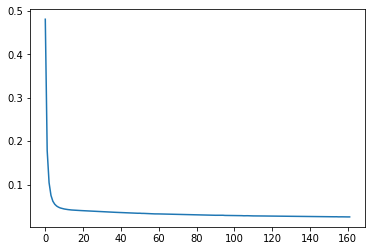

In [28]:
plt.plot(clf.loss_curve_)
plt.show()

In [38]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9893617021276596
F1-score [0.9930265  0.97757848]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2525
           1       0.96      1.00      0.98       765

    accuracy                           0.99      3290
   macro avg       0.98      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



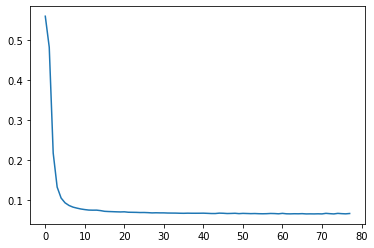

In [39]:
plt.plot(clf.loss_curve_)
plt.show()

In [46]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum", "adam"]

In [47]:
import warnings
from sklearn.exceptions import ConvergenceWarning

constant learning-rate
training set score and loss: 0.767, 3.583430


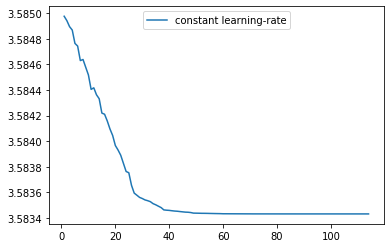

constant with momentum
training set score and loss: 0.767, 294.654723


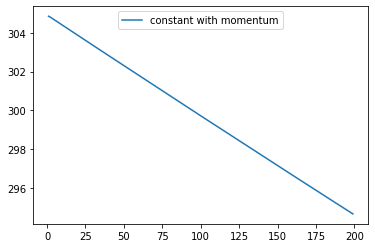

inv-scaling learning-rate
training set score and loss: 0.767, 3.585306


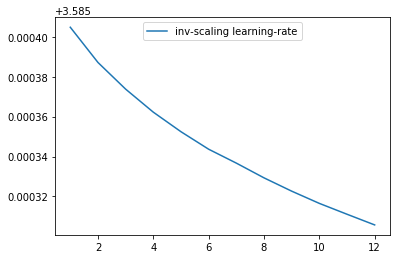

inv-scaling with momentum
training set score and loss: 0.767, 304.880294


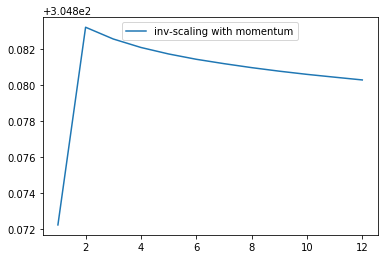

adam
training set score and loss: 0.990, 0.051356


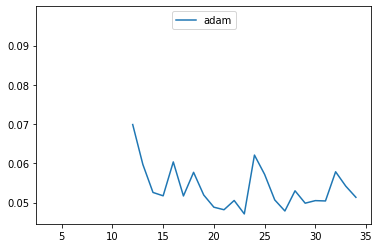

In [48]:
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(random_state=0, max_iter=200, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X, y)

    print("training set score and loss: %.3f, %f" % (clf.score(X, y), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

# Keras Deep Neural Networks

In [38]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [39]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [40]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=10).history

Epoch 1/50
13158/13158 [==============================] - 2s 115us/step - loss: 0.0606 - accuracy: 0.9843
Epoch 2/50
13158/13158 [==============================] - 1s 86us/step - loss: 0.0410 - accuracy: 0.9889
Epoch 3/50
13158/13158 [==============================] - 1s 86us/step - loss: 0.0389 - accuracy: 0.9889
Epoch 4/50
13158/13158 [==============================] - 1s 87us/step - loss: 0.0366 - accuracy: 0.9894
Epoch 5/50
13158/13158 [==============================] - 1s 89us/step - loss: 0.0354 - accuracy: 0.9891
Epoch 6/50
13158/13158 [==============================] - 1s 87us/step - loss: 0.0346 - accuracy: 0.9886
Epoch 7/50
13158/13158 [==============================] - 1s 90us/step - loss: 0.0331 - accuracy: 0.9898
Epoch 8/50
13158/13158 [==============================] - 1s 98us/step - loss: 0.0326 - accuracy: 0.9901
Epoch 9/50
13158/13158 [==============================] - 1s 94us/step - loss: 0.0310 - accuracy: 0.9904
Epoch 10/50
13158/13158 [=============================

In [41]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=50).history

Epoch 1/50
13158/13158 [==============================] - 1s 56us/step - loss: 0.0978 - accuracy: 0.9764
Epoch 2/50
13158/13158 [==============================] - 0s 36us/step - loss: 0.0445 - accuracy: 0.9888
Epoch 3/50
13158/13158 [==============================] - 0s 38us/step - loss: 0.0412 - accuracy: 0.9891
Epoch 4/50
13158/13158 [==============================] - 0s 37us/step - loss: 0.0393 - accuracy: 0.9892
Epoch 5/50
13158/13158 [==============================] - 0s 36us/step - loss: 0.0375 - accuracy: 0.9891
Epoch 6/50
13158/13158 [==============================] - 1s 40us/step - loss: 0.0365 - accuracy: 0.9891
Epoch 7/50
13158/13158 [==============================] - 1s 39us/step - loss: 0.0357 - accuracy: 0.9893
Epoch 8/50
13158/13158 [==============================] - 0s 38us/step - loss: 0.0344 - accuracy: 0.9891
Epoch 9/50
13158/13158 [==============================] - 1s 38us/step - loss: 0.0332 - accuracy: 0.9894
Epoch 10/50
13158/13158 [==============================

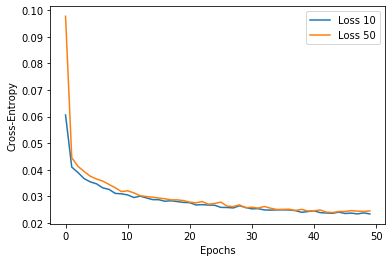

In [42]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [43]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

3290/3290 [==============================] - 0s 23us/step
Loss 0.028791, Accuracy 0.991489
Loss 0.023984, Accuracy 0.993313


In [44]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7735562310030395
F1-score [0.87148525 0.04853129]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2526
           1       1.00      0.02      0.05       764

    accuracy                           0.77      3290
   macro avg       0.89      0.51      0.46      3290
weighted avg       0.83      0.77      0.68      3290



In [46]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10).history

Train on 13158 samples, validate on 3290 samples
Epoch 1/100
13158/13158 [==============================] - 2s 124us/step - loss: 0.0616 - accuracy: 0.9825 - val_loss: 0.0391 - val_accuracy: 0.9894
Epoch 2/100
13158/13158 [==============================] - 1s 96us/step - loss: 0.0423 - accuracy: 0.9886 - val_loss: 0.0350 - val_accuracy: 0.9903
Epoch 3/100
13158/13158 [==============================] - 1s 97us/step - loss: 0.0388 - accuracy: 0.9893 - val_loss: 0.0337 - val_accuracy: 0.9915
Epoch 4/100
13158/13158 [==============================] - 1s 103us/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0307 - val_accuracy: 0.9921
Epoch 5/100
13158/13158 [==============================] - 1s 108us/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0313 - val_accuracy: 0.9918
Epoch 6/100
13158/13158 [==============================] - 1s 100us/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0314 - val_accuracy: 0.9918
Epoch 7/100
13158/13158 [==============================] - 

In [47]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))

3290/3290 [==============================] - 0s 11us/step
Loss 0.028791, Accuracy 0.991489
Loss 0.023984, Accuracy 0.993313
Loss 0.024656, Accuracy 0.993009


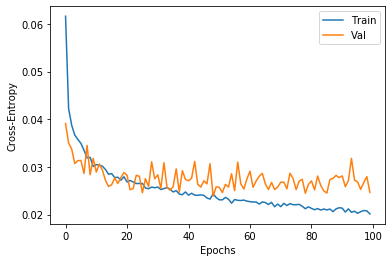

In [48]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## Early Stopping

In [50]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [51]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                      batch_size=10, callbacks=[es,mc]).history

Train on 10526 samples, validate on 2632 samples
Epoch 1/100
10526/10526 [==============================] - 1s 137us/step - loss: 0.0621 - accuracy: 0.9855 - val_loss: 0.0417 - val_accuracy: 0.9886
Epoch 2/100
10526/10526 [==============================] - 1s 111us/step - loss: 0.0438 - accuracy: 0.9885 - val_loss: 0.0390 - val_accuracy: 0.9894
Epoch 3/100
10526/10526 [==============================] - 1s 106us/step - loss: 0.0394 - accuracy: 0.9885 - val_loss: 0.0399 - val_accuracy: 0.9901
Epoch 4/100
10526/10526 [==============================] - 1s 102us/step - loss: 0.0384 - accuracy: 0.9890 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 5/100
10526/10526 [==============================] - 1s 111us/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 6/100
10526/10526 [==============================] - 1s 99us/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0377 - val_accuracy: 0.9875
Epoch 7/100
10526/10526 [==============================] -

In [52]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

3290/3290 [==============================] - 0s 11us/step
Loss 0.028791, Accuracy 0.991489
Loss 0.023984, Accuracy 0.993313
Loss 0.024656, Accuracy 0.993009
Loss 0.030356, Accuracy 0.990881


## L2 Regularization

In [53]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [54]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                    batch_size=10, callbacks=[es,mc]).history

Train on 10526 samples, validate on 2632 samples
Epoch 1/100
10526/10526 [==============================] - 2s 190us/step - loss: 0.5281 - accuracy: 0.9232 - val_loss: 0.1604 - val_accuracy: 0.9521
Epoch 2/100
10526/10526 [==============================] - 1s 140us/step - loss: 0.1851 - accuracy: 0.9433 - val_loss: 0.1497 - val_accuracy: 0.9536
Epoch 3/100
10526/10526 [==============================] - 2s 151us/step - loss: 0.2110 - accuracy: 0.9331 - val_loss: 0.1545 - val_accuracy: 0.9574
Epoch 4/100
10526/10526 [==============================] - 2s 146us/step - loss: 0.1819 - accuracy: 0.9575 - val_loss: 0.1276 - val_accuracy: 0.9791
Epoch 5/100
10526/10526 [==============================] - 1s 139us/step - loss: 0.1519 - accuracy: 0.9724 - val_loss: 0.1530 - val_accuracy: 0.9639
Epoch 6/100
10526/10526 [==============================] - 2s 150us/step - loss: 0.1705 - accuracy: 0.9717 - val_loss: 0.1546 - val_accuracy: 0.9639
Epoch 7/100
10526/10526 [==============================] 

In [55]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [56]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=100, batch_size=10, callbacks=[es,mc]).history

Train on 10526 samples, validate on 2632 samples
Epoch 1/100
10526/10526 [==============================] - 2s 209us/step - loss: 0.1811 - accuracy: 0.1230 - val_loss: 0.1590 - val_accuracy: 0.0019
Epoch 2/100
10526/10526 [==============================] - 2s 143us/step - loss: 0.1765 - accuracy: 0.0158 - val_loss: 0.1694 - val_accuracy: 7.5988e-04
Epoch 3/100
10526/10526 [==============================] - 2s 153us/step - loss: 0.1729 - accuracy: 0.0044 - val_loss: 0.1699 - val_accuracy: 7.5988e-04
Epoch 4/100
10526/10526 [==============================] - 1s 141us/step - loss: 0.1642 - accuracy: 0.0041 - val_loss: 0.1627 - val_accuracy: 0.0011
Epoch 5/100
10526/10526 [==============================] - 2s 149us/step - loss: 0.1727 - accuracy: 0.0023 - val_loss: 0.1744 - val_accuracy: 0.0000e+00
Epoch 6/100
10526/10526 [==============================] - 2s 147us/step - loss: 0.1829 - accuracy: 0.0026 - val_loss: 0.1802 - val_accuracy: 0.0019
Epoch 7/100
10526/10526 [====================

In [57]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

3290/3290 [==============================] - 0s 45us/step


In [58]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.028131, Accuracy 0.992705
Loss 0.070167, Accuracy 0.990881
Loss 0.125146, Accuracy 0.000000


## Hyper-Parameter Tuning

In [59]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [60]:
def build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [61]:
n_layers = [1, 2, 3]
h_dim = [32, 64, 128]
activation = ['relu', 'tanh']
optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [62]:
model = KerasRegressor(build_fn=build_model)

rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

3508/3508 [==============================] - 0s 22us/step


In [63]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 0.109877 using {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 32, 'activation': 'relu'}
0.109877 (0.029848) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 32, 'activation': 'relu'}
0.162558 (0.004247) with: {'optimizer': 'adam', 'n_layers': 3, 'h_dim': 64, 'activation': 'relu'}
1.316386 (1.702062) with: {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 64, 'activation': 'relu'}
0.149146 (0.012597) with: {'optimizer': 'adagrad', 'n_layers': 3, 'h_dim': 64, 'activation': 'tanh'}
0.155275 (0.008403) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 128, 'activation': 'tanh'}


In [64]:
clf = rnd_result.best_estimator_.model

loss, acc = clf.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (loss, acc))

3290/3290 [==============================] - 0s 22us/step
Loss 0.111200, Accuracy 0.013070


In [59]:
#gridsearch

In [49]:
mlp = MLPClassifier(max_iter=100)

In [50]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [54]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [55]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.990 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.990 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.989 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.991 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.989 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.990 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver

In [56]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2525
           1       0.98      0.98      0.98       765

    accuracy                           0.99      3290
   macro avg       0.99      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



In [58]:
# print best parameter after tuning 
print(clf.best_params_) 
print()
# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_) 


{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
